In [4]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")


PyTorch version: 2.6.0
torchvision version: 0.21.0


### Getting CV data Fashion MNIST

In [6]:
#training data
train_data=datasets.FashionMNIST(
    root= "data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

#test data
test_data=datasets.FashionMNIST(
    root= "data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████████████████████████████████| 26.4M/26.4M [00:02<00:00, 9.08MB/s]
100%|███████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 299kB/s]
100%|██████████████████████████████████████| 4.42M/4.42M [00:00<00:00, 5.53MB/s]
100%|██████████████████████████████████████| 5.15k/5.15k [00:00<00:00, 7.23MB/s]


In [7]:
len(train_data)

60000

In [8]:
image, label=train_data[0]

In [9]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [10]:
image.shape

torch.Size([1, 28, 28])

In [11]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [12]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [13]:
dir(train_data)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [14]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

## Visulaize data

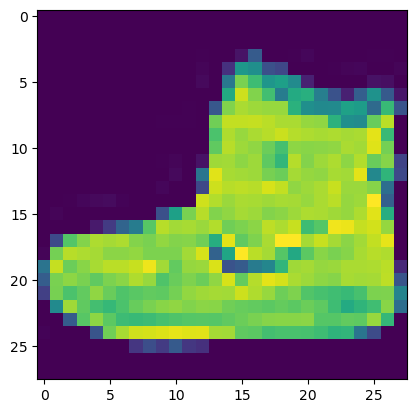

In [16]:
from matplotlib import pyplot as plt

plt.imshow(image.squeeze())

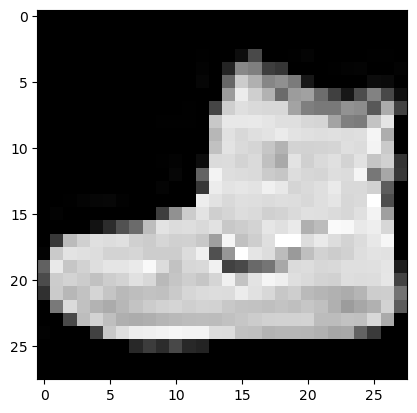

In [17]:
plt.imshow(image.squeeze(), cmap="gray")

In [18]:
random_idx = torch.randint(0, len(train_data), size=[1])
random_idx.item()

8916

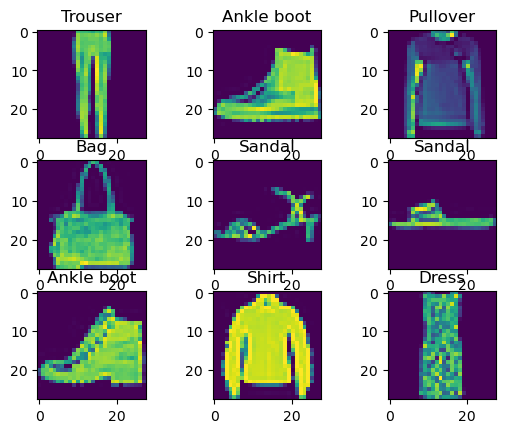

In [19]:
plt.figsize=(4,4)
rows=3
columns=3
for img in range(1,rows*columns+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image,label= train_data[random_idx]
    plt.subplot(rows,columns,img)
    plt.imshow(image.squeeze())
    plt.title(train_data.classes[label])


## Data Loader

In [21]:
from torch.utils.data import DataLoader

batch=32

train_dataloader=DataLoader(train_data,batch_size=batch,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=batch,shuffle=True)

In [22]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {batch}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {batch}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x15a4a4980>, <torch.utils.data.dataloader.DataLoader object at 0x15a4828a0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [23]:
train_dataloader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [24]:
next(iter(train_dataloader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [25]:
train_features_batch, train_labels_batch=next(iter(train_dataloader))
print(f"Features:\n {train_features_batch.shape}")
print(f"Labels:\n {train_labels_batch.shape}")

Features:
 torch.Size([32, 1, 28, 28])
Labels:
 torch.Size([32])


## Build Base model

In [27]:
from torch import nn


class ComputerVisionModel(nn.Module):
    def __init__(self,input_shape,out,hidden):
        super().__init__()
        self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden),
        nn.Linear(in_features=hidden,out_features=out) )

    def forward(self,X):
        return self.layer_stack(X)
    

In [28]:
torch.manual_seed(42)

model0=ComputerVisionModel(784,10,20)
model0.to("cpu")
model0


ComputerVisionModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [30]:
#define accuracy score, loss function and optimizer
from helper_functions import accuracy_fn 
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.05)

### Create a train and test loop

In [32]:
epochs=5

for epoch in range(0,epochs):
    train_loss=0
    
    for batch,(X,y) in enumerate(train_dataloader):
        
        model0.train()
        y_pred=model0(X)
        loss=loss_fn(y_pred,y)
        print(f"Loss Value {loss}")
        print(f"loss type: {type(loss)}")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        train_loss+= loss

        if batch%400==0:
            print(f"Trained on {batch*len(X)}/{len(test_dataloader.dataset)} samples" )
    ##training loss per epoch
    train_loss/=len(train_dataloader.dataset)

    #evaluation

    test_loss=0
    test_acc=0
    model0.eval()
    with torch.inference_mode():
        for batch,(X_test,y) in enumerate(test_dataloader):
        
            y_eval=model0(X_test)
    
            loss=loss_fn(y_eval,y)
    
            test_loss+=loss
            test_acc+= accuracy_fn(y_true=y,y_pred=y_eval.argmax(dim=1))

        ##test loss per epoch
        test_loss/=len(test_dataloader.dataset)
        test_acc/=len(test_dataloader.dataset)

    print(f"epoch:{epoch} | train_loss={train_loss} | test_loss={test_loss} | test_acc={test_acc}\n\n")


Loss Value 2.2979109287261963
loss type: <class 'torch.Tensor'>
Trained on 0/10000 samples
Loss Value 2.3651654720306396
loss type: <class 'torch.Tensor'>
Loss Value 2.236293315887451
loss type: <class 'torch.Tensor'>
Loss Value 2.1941730976104736
loss type: <class 'torch.Tensor'>
Loss Value 2.1274962425231934
loss type: <class 'torch.Tensor'>
Loss Value 2.118349075317383
loss type: <class 'torch.Tensor'>
Loss Value 2.0783560276031494
loss type: <class 'torch.Tensor'>
Loss Value 2.1085281372070312
loss type: <class 'torch.Tensor'>
Loss Value 2.059080123901367
loss type: <class 'torch.Tensor'>
Loss Value 1.8946391344070435
loss type: <class 'torch.Tensor'>
Loss Value 1.9658520221710205
loss type: <class 'torch.Tensor'>
Loss Value 1.922337532043457
loss type: <class 'torch.Tensor'>
Loss Value 1.8648830652236938
loss type: <class 'torch.Tensor'>
Loss Value 2.01227068901062
loss type: <class 'torch.Tensor'>
Loss Value 1.808453917503357
loss type: <class 'torch.Tensor'>
Loss Value 1.6688081

In [ ]:
5